## This code has teh goal of organizing the different folders, taking the relevant files and then running a preliminary model

In [ ]:
## AUTOMATICALLY ANONYMIZING ALL THE FILES

In [13]:
import os
import spacy
location = r'C:\Users\MarcoMascolo\Downloads\MRI - Copy\TO'

import os
import spacy
import re


nlp = spacy.load("en_core_web_sm")

# Updated anonymize_entities function
def anonymize_entities(text):
    doc = nlp(text)
    redacted_text = text
    # Find all words starting with an uppercase letter followed by any number of characters, and separated by space or comma
    possible_names = re.findall(r'\b[A-Z][a-z]*[\s,][A-Z][a-z]*', text)
    for possible_name in possible_names:
        name_doc = nlp(possible_name)
        # Check if the first two words form a person's name
        if len(name_doc.ents) > 0 and name_doc.ents[0].label_ == "PERSON":
            redacted_text = redacted_text.replace(possible_name, "REDACTED")
    for ent in doc.ents:
        if ent.label_ in ["PERSON", "ORG", "GPE", "LOC"]:
            redacted_text = redacted_text.replace(ent.text, "REDACTED")
    return redacted_text

def rename(path, index):
    directory = os.path.dirname(path)
    base_name = os.path.basename(path)
    extension = os.path.splitext(base_name)[1]
    if '.brainlab' in base_name:
        extension = '.brainlab' + extension
    anonymized_name = "test_" + str(index) + extension
    new_path = os.path.join(directory, anonymized_name)

    counter = 1
    while os.path.exists(new_path):
        anonymized_name = "test_" + str(index) + '_' + str(counter) + extension
        new_path = os.path.join(directory, anonymized_name)
        counter += 1

    os.rename(path, new_path)

def main():
    main_folder = location
    all_paths = []
    total_count = 0
    renamed_count = 0

    for root, dirs, files in os.walk(main_folder):
        for name in files:
            all_paths.append(os.path.join(root, name))
        for name in dirs:
            all_paths.append(os.path.join(root, name))

    total_count = len(all_paths)

    for index, path in enumerate(all_paths):
        name = os.path.basename(path)
        # Updated regex to match 'letters, letters' anywhere in the string
        name_regex = r'.*\b[A-Za-z]+,\s[A-Za-z]+.*'
        if re.match(name_regex, name):
            anonymized_name = anonymize_entities(name)
            if anonymized_name != name:
                rename(path, index)
                renamed_count += 1

    print(f'All done. {renamed_count} out of {total_count} files and directories were renamed.')

if __name__ == "__main__":
    main()


All done. 68 out of 144 files and directories were renamed.


In [16]:
# Slower More Sophisticated Version

In [ ]:
## AUTOMATICALLY UNZIPPING ALL THE FILES

In [15]:
import os
import zipfile

def unzip_and_delete(file_path, foldername):
    try:
        # Open the zip file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # Extract all files
            print(f"Unzipping {file_path}...")
            zip_ref.extractall(foldername)
        # Delete the zip file
        os.remove(file_path)
        print(f"Unzipped and deleted {file_path} successfully!")
        return True
    except zipfile.BadZipFile:
        print(f"Bad zip file {file_path}!")
    except Exception as e:
        print(f"Something went wrong with file {file_path}. Error: {str(e)}")
    return False

# Walk through all directories and subdirectories
total_processed = 0
for foldername, subfolders, filenames in os.walk(location):
    for filename in filenames:
        # Check if the file is a zip file
        if filename.endswith('.zip'):
            # Construct full file path
            file_path = os.path.join(foldername, filename)
            if unzip_and_delete(file_path, foldername):
                total_processed += 1

print(f"\nDone! Total zip files processed: {total_processed}")



Done! Total zip files processed: 0


In [20]:
## Opening DCMI Files

In [4]:
!pip install matplotlib pydicom


Trying to read DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO004\25808676\15209000\15341007
Successfully read DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO004\25808676\15209000\15341007


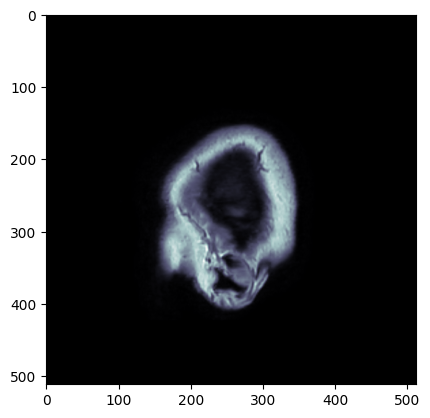

In [6]:
import pydicom
import matplotlib.pyplot as plt

# Path to your DICOM file
file_path = r"C:\Users\MarcoMascolo\Downloads\MRI\TO\TO004\25808676\15209000\15341007"

print(f"Trying to read DICOM file at {file_path}")

try:
    # Read the DICOM file
    dcm = pydicom.dcmread(file_path, force=True)
    print(f"Successfully read DICOM file at {file_path}")
    
    # Get the image from pixel data
    image = dcm.pixel_array
    
    # Display the image
    plt.imshow(image, cmap=plt.cm.bone)
    plt.show()

except Exception as e:
    print(f"Failed to read DICOM file at {file_path}. Error: {str(e)}")


Successfully read DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO004\25808676\15209000\15341007
Sequence Name:  
Protocol Name:  MPR SAG
Series Description:  MPR SAG
ScanningSequence: GR
SequenceVariant: MP
ScanOptions: OTHER
MRAcquisitionType: 3D
SequenceName: 
AngioFlag not available


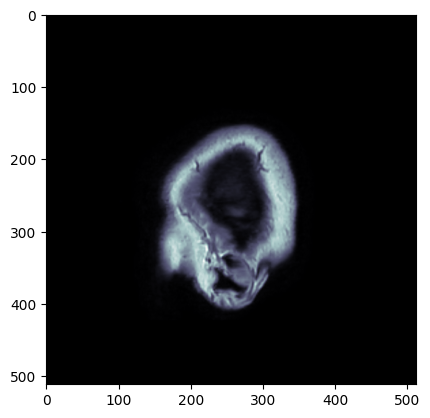

In [11]:
import pydicom
import matplotlib.pyplot as plt

# Path to your DICOM file
file_path = r"C:\Users\MarcoMascolo\Downloads\MRI\TO\TO004\25808676\15209000\15341007"

# Read the DICOM file
try:
    dcm = pydicom.dcmread(file_path)
    print(f"Successfully read DICOM file at {file_path}")
    # Print type of MRI scan
    if "SequenceName" in dcm:
        print("Sequence Name: ", dcm.SequenceName)
    if "ProtocolName" in dcm:
        print("Protocol Name: ", dcm.ProtocolName)
    if "SeriesDescription" in dcm:
        print("Series Description: ", dcm.SeriesDescription)
    try:
        print(f"ScanningSequence: {dcm.ScanningSequence}")
    except:
        print("ScanningSequence not available")
    try:
        print(f"SequenceVariant: {dcm.SequenceVariant}")
    except:
        print("SequenceVariant not available")
    try:
        print(f"ScanOptions: {dcm.ScanOptions}")
    except:
        print("ScanOptions not available")
    try:
        print(f"MRAcquisitionType: {dcm.MRAcquisitionType}")
    except:
        print("MRAcquisitionType not available")
    try:
        print(f"SequenceName: {dcm.SequenceName}")
    except:
        print("SequenceName not available")
    try:
        print(f"AngioFlag: {dcm.AngioFlag}")
    except:
        print("AngioFlag not available")

    # Print the image
    if 'PixelData' in dcm:
        plt.imshow(dcm.pixel_array, cmap=plt.cm.bone)
        plt.show()
    else:
        print("Cannot display image - PixelData not present in DICOM file")
except Exception as e:
    print(f"Failed to read DICOM file at {file_path}. Error: {str(e)}")




In [12]:
## AUTOMATICALLY RECREATE THE FOLDERS

In [16]:
import os
import pydicom
import shutil
import numpy as np

# Paths
original_folder_path = r"C:\Users\MarcoMascolo\Downloads\MRI\TO"
new_folder_path = r"C:\Users\MarcoMascolo\Downloads\MRI\TO_Redone"

# Walk through all directories and subdirectories
for foldername, subfolders, filenames in os.walk(original_folder_path):
    for filename in filenames:
        # Construct full file path
        file_path = os.path.join(foldername, filename)

        try:
            # Attempt to read the DICOM file
            dcm = pydicom.dcmread(file_path)

            # Check if the DICOM file has pixel data
            if not 'PixelData' in dcm:
                continue

            # Ensure the image is not all black
            if np.all(dcm.pixel_array == 0):
                continue

            # Create the new directory path
            new_dir = os.path.join(new_folder_path, foldername.split("\\")[-1], dcm.SeriesDescription)
            
            # Create the directory if it doesn't exist
            os.makedirs(new_dir, exist_ok=True)

            # Construct the new file path
            new_file_path = os.path.join(new_dir, filename)
            
            # Move the DICOM file to the new directory
            shutil.move(file_path, new_file_path)

        except Exception as e:
            print(f"Failed to process file at {file_path}. Error: {str(e)}")


Total number of folders created: 0


In [2]:
import os
import pydicom
import shutil
import numpy as np

# Paths
original_folder_path = r"C:\Users\MarcoMascolo\Downloads\MRI\TO"
new_folder_path = r"C:\Users\MarcoMascolo\Downloads\MRI\TO_organized"

# Function to sanitize the filename
def sanitize_filename(filename):
    return ''.join(c if c.isalnum() else '_' for c in filename)

# Function to get the TO folder name from a file path
def get_TO_folder(file_path):
    # Split the file path into components
    path_parts = file_path.split("\\")
    # Find the index of the "TO" directory in the path
    TO_index = path_parts.index("TO")
    # Return the name of the TOXX folder (it should be the next one in the path)
    return path_parts[TO_index + 1]

# Walk through all directories and subdirectories
for foldername, subfolders, filenames in os.walk(original_folder_path):
    for filename in filenames:
        # Check if the file is a DICOM file
        if not filename.endswith('.dcm'):
            # Construct full file path
            file_path = os.path.join(foldername, filename)
            
            try:
                # Read the DICOM file
                dcm = pydicom.dcmread(file_path)
                
                # Ensure the image is not all black
                if np.all(dcm.pixel_array == 0):
                    continue

                # Create the new directory path
                new_dir = os.path.join(new_folder_path, get_TO_folder(file_path), sanitize_filename(dcm.SeriesDescription))
                
                # Create the directory if it doesn't exist
                os.makedirs(new_dir, exist_ok=True)

                # Construct the new file path
                new_file_path = os.path.join(new_dir, filename)
                
                # Move the DICOM file to the new directory
                shutil.copy(file_path, new_file_path)

            except Exception as e:
                print(f"Failed to process DICOM file at {file_path}. Error: {str(e)}")

# Count the total number of folders created
folder_count = sum([len(folders) for _, folders, _ in os.walk(new_folder_path)])
print(f"Total number of folders created: {folder_count}")


Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO001\DICOMDIR. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO001\68387695\13107610\01372321. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO001\68387695\13107610\99809971. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO001\68387695\65429761\65429762. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Down

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO009\DICOMDIR. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO009\63243554\49745310\01837021. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO009\63243554\49745310\32023531. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO009\63243554\49745310\54519311. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Down

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO011\DICOMDIR. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO011\49494937\09960450\09960451. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO011\49494937\09960450\21429171. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO011\49494937\51637330\51637331. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Down

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO015\73992932\86368350\86368351. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO016\DICOMDIR. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO016\92462336\21632971\21789070. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO016\92462336\46724720\14057111. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Down

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO021\DICOMDIR. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO021\31154696\18720030\18720031. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO021\31154696\37972830\37972831. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO021\31154696\37972830\39018241. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Down

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO025\17929891\28999900\41341181. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO025\17929891\28999900\45871881. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO025\17929891\28999900\54307711. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO025\17929891\28999900\79927591. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO030\48208228\65522260\45414701. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO030\48208228\65522260\67616571. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO030\48208228\65522260\78239621. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO030\48208228\65522260\95095801. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO034\79119669\15889440\08373391. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO034\79119669\15889440\22242391. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO034\79119669\15889440\24464341. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO034\79119669\15889440\36725411. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO040\51383039\02364500\02364501. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO040\51383039\99641550\02141121. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO040\51383039\99641550\07921381. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO040\51383039\99641550\14795231. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO044\DICOMDIR. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO044\30256070\37112390\37112391. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO044\30256070\51075250\08443601. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO044\30256070\51075250\58054591. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Down

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO050\39949634\22596990\22596991. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO050\39949634\88417310\16320701. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO050\39949634\88417310\20367291. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO050\39949634\88417310\21670491. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO056\DICOMDIR. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO056\77598328\13477570\01742291. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO056\77598328\13477570\47221031. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO056\77598328\13477570\58000861. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Down

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO060\DICOMDIR. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO060\82373842\10583640\07613921. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO060\82373842\10583640\10583641. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO060\82373842\10583640\12613271. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Down

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO065\DICOMDIR. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO065\98944093\38725821\38725822. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO065\98944093\48203300\29226841. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO065\98944093\48203300\33582941. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Down

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO075\38611966\81425060\14250611. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO075\38611966\81425060\14350110. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO075\38611966\81425060\14350115. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO075\38611966\81425060\14350120. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO077\26918681\93190450\93190451. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO078\DICOMDIR. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO078\12590886\13184020\25775621. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO078\12590886\13184020\31746221. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Down

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO082\DICOMDIR. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO082\17956315\22086592\22086593. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO082\17956315\55662070\04247211. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO082\17956315\55662070\08763133. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Down

Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO088\DICOMDIR. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO088\75160581\67234750\39845111. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO088\75160581\67234750\67234751. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Downloads\MRI\TO\TO088\75160581\67234750\67234753. Error: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Failed to process DICOM file at C:\Users\MarcoMascolo\Down

In [ ]:
## MODEL TEST

In [ ]:
import os
import re
import pydicom
import torch
from transformers import AutoModel
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Path to the directory containing  model
model_dir = "C:\\Users\\MarcoMascolo\\Downloads\\3d_attention_unet\\trial_4attention_unet_3d"
model = tf.saved_model.load(model_dir)
print(model)

def dice_coef(y_true, y_pred, smooth=1):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
    union = tf.reduce_sum(y_true, axis=[1,2,3]) + tf.reduce_sum(y_pred, axis=[1,2,3])
    dice = tf.reduce_mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice

def tversky_loss(y_true, y_pred, alpha=0.7, beta=0.3, smooth=1e-10):
    y_true_pos = tf.reshape(y_true, [-1])
    y_pred_pos = tf.reshape(y_pred, [-1])
    true_pos = tf.reduce_sum(y_true_pos * y_pred_pos)
    false_neg = tf.reduce_sum(y_true_pos * (1-y_pred_pos))
    false_pos = tf.reduce_sum((1-y_true_pos)*y_pred_pos)
    return 1 - (true_pos + smooth)/(true_pos + alpha*false_neg + beta*false_pos + smooth)


# Load the model
model = tf.keras.models.load_model(model_dir, custom_objects={'dice_coef': dice_coef, 'tversky_loss': tversky_loss})

# Print model's architecture
model.summary()


# Load the model
# model = AutoModel.from_pretrained("maryann-gitonga/brain-tumor-segmentation-3d-attention-unet")

# This function loads a DICOM file
def load_dicom_file(filepath):
    ds = pydicom.dcmread(filepath)
    img = ds.pixel_array
    img = img.astype(np.float32)  # Convert to float32
    return img


def find_sequence_folder(patient_folder, sequence_name):
    for name in os.listdir(patient_folder):
        if re.search(sequence_name, name, re.IGNORECASE):
            return os.path.join(patient_folder, name)
    return None

from sklearn.preprocessing import StandardScaler
from scipy.ndimage import zoom

def read_folder_sequence(patient_folder):
    sequences = ['T1', 'T2', 'T2_FLAIR']
    sequence_data = []
    scaler = StandardScaler()
    
    for seq in sequences:
        sequence_folder = find_sequence_folder(patient_folder, seq)
        if sequence_folder is None:
            print(f'Could not find {seq} folder in {patient_folder}. Skipping this patient...')
            return None
        sequence_slices = []

        for file in os.listdir(sequence_folder):
            dicom_file = os.path.join(sequence_folder, file)
            img = load_dicom_file(dicom_file)
            sequence_slices.append(img)
        
        sequence_slices = np.stack(sequence_slices, axis=2)
        
        # Resampling each sequence to have 128 slices
        depth = sequence_slices.shape[2]
        if depth != 128:
            zoom_factor = 128 / depth
            sequence_slices = zoom(sequence_slices, (1, 1, zoom_factor))
        
        sequence_slices = scaler.fit_transform(sequence_slices.reshape(-1, sequence_slices.shape[-1])).reshape(sequence_slices.shape)
        sequence_data.append(sequence_slices)
    
        # Print the shape of the sequence data
        print(f'Shape of sequence_data for {seq}: {sequence_slices.shape}')
    
    if len(sequence_data) != len(sequences):
        return None

    combined_image = np.stack(sequence_data, axis=3)
    
    # Ensure the final combined_image has a shape of (128, 128, 128, 3)
    combined_image = combined_image[56:184, 56:184, :, :]
    
    return combined_image




base_folder = r'C:\Users\MarcoMascolo\Downloads\MRI\TO_organized'
patient_folders = [os.path.join(base_folder, f) for f in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, f))]


prediction_count = 0

for patient_folder in patient_folders:
    combined_image = read_folder_sequence(patient_folder)
    
    if combined_image is None:
        print(f'Skipped patient folder: {patient_folder}\n')
        continue

    # Convert your data into a PyTorch tensor and add an extra dimension
    input_tensor = torch.from_numpy(combined_image).unsqueeze(0)

    # Ensure your tensor is of type float32
    input_tensor = input_tensor.float()

    # Convert PyTorch tensor to numpy array
    input_numpy = input_tensor.numpy()

    # Perform inference
    output = model(input_numpy)

    # The output is a PyTorch tensor. Convert it to numpy array for visualization
    output_numpy = output.numpy()

    # Visualize the original T1CE scan and the corresponding output
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(combined_image[:,:,50, 0], cmap='gray')  # 50 is the slice number
    ax[0].set_title('Original T1CE Image')
    ax[1].imshow(output_numpy[0, :, :, 50], cmap='gray')  # 50 is the slice number
    ax[1].set_title('Segmented Tumor')
    plt.show()
    
    prediction_count += 1
    if prediction_count >= 4:
        break


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x000001F284B950D0>
Model: "Attention_UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_117 (Conv3D)            (None, 128, 128, 12  1312        ['input_6[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_27 (Dropout)           (None, 128, 128, 12  0         

                                )                                                                 
                                                                                                  
 conv3d_130 (Conv3D)            (None, 8, 8, 8, 1)   129         ['activation_40[0][0]']          
                                                                                                  
 activation_41 (Activation)     (None, 8, 8, 8, 1)   0           ['conv3d_130[0][0]']             
                                                                                                  
 up_sampling3d_24 (UpSampling3D  (None, 16, 16, 16,   0          ['activation_41[0][0]']          
 )                              1)                                                                
                                                                                                  
 conv3d_135 (Conv3D)            (None, 8, 8, 8, 64)  8256        ['activation_39[0][0]']          
          

 up_sampling3d_28 (UpSampling3D  (None, 64, 64, 64,   0          ['activation_47[0][0]']          
 )                              1)                                                                
                                                                                                  
 conv3d_149 (Conv3D)            (None, 8, 8, 8, 64)  8256        ['activation_39[0][0]']          
                                                                                                  
 conv3d_150 (Conv3D)            (None, 8, 8, 8, 64)  27712       ['conv3d_118[0][0]']             
                                                                                                  
 conv3d_139 (Conv3D)            (None, 32, 32, 32,   276544      ['concatenate_13[0][0]']         
                                64)                                                               
                                                                                                  
 lambda_14

                                8, 4)                                                             
                                                                                                  
 batch_normalization_35 (BatchN  (None, 128, 128, 12  16         ['conv3d_155[0][0]']             
 ormalization)                  8, 4)                                                             
                                                                                                  
 activation_51 (Activation)     (None, 128, 128, 12  0           ['batch_normalization_35[0][0]'] 
                                8, 4)                                                             
                                                                                                  
Total params: 6,239,256
Trainable params: 6,238,512
Non-trainable params: 744
__________________________________________________________________________________________________
Shape of sequence_data for T1: 

In [ ]:
# MASKING IMAGES

In [ ]:
import monai
from monai.networks.nets import UNet
from monai.transforms import (
    Compose, LoadImaged, AddChanneld, ScaleIntensityd, 
    ToTensord, Activationsd, AsDiscreted
)
import numpy as np
import os
import torch  

# Load pre-trained UNet model from MONAI
model = UNet(
    spatial_dims=2,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
).eval()

# Define the transforms for image preprocessing and postprocessing
pre_transforms = Compose([
    LoadImaged(keys="image"),
    AddChanneld(keys="image"),
    ScaleIntensityd(keys="image"),
    ToTensord(keys="image"),
])

post_transforms = Compose([
    Activationsd(keys="pred", softmax=True),
    AsDiscreted(keys="pred", argmax=True),
])

# Function to segment tumor in an image
def segment_tumor(image_path):
    # Preprocess the image
    data = {"image": image_path}
    data = pre_transforms(data)
    
    # Predict the mask
    with torch.no_grad():
        prediction = model(data["image"].unsqueeze(0))  
    data["pred"] = prediction.squeeze(0)
    
    # Postprocess the prediction to get the binary mask
    data = post_transforms(data)
    mask = data["pred"][0]  # binary segmentation (0: background, 1: tumor)

    return mask.numpy()

# patient folders
base_folder = r'C:\Users\MarcoMascolo\Downloads\MRI\TO_organized'
patient_folders = [os.path.join(base_folder, f) for f in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, f))]

# Iterate over patient folders and segment tumors in each image
segmented_masks = {}
for patient_folder in patient_folders:
    patient_id = os.path.basename(patient_folder)
    image_files = [f for f in os.listdir(patient_folder) if f.endswith('.dcm')] 
    segmented_masks[patient_id] = [segment_tumor(os.path.join(patient_folder, file)) for file in image_files]


In [ ]:
# Load Labels and One-Hot Encode Classes

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the labels from the Excel file
labels_path = 'C:\\Users\\MarcoMascolo\\Downloads\\__Marco\\Test\\ML Glioma\\label.xls'
labels_df = pd.read_excel(labels_path)

# Create a new column in DataFrame for combined classes
labels_df['combined_label'] = labels_df.apply(lambda row: (row['MGMT'] << 1) | row['IDH'], axis=1)

# OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_labels = encoder.fit_transform(labels_df[['combined_label']].astype(int))

In [ ]:
# Prepare Data for Training

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

base_folder = r'C:\Users\MarcoMascolo\Downloads\MRI\TO_organized'

# Function to preprocess and load segmented images
def preprocess_images(segmented_images):
    preprocessed_images = []
    for image in segmented_images:
        # Resize image to 64x64 for the CNN input
        resized_image = cv2.resize(image, (64, 64))
        # Normalize the image data to 0-1 range
        normalized_image = resized_image / 255.0
        preprocessed_images.append(normalized_image)
    return np.array(preprocessed_images)

X = []
y = []

for patient_id, masks in segmented_masks.items():
    # Preprocess the segmented images
    preprocessed_images = preprocess_images(masks)
    # Append the preprocessed images to the dataset
    X.extend(preprocessed_images)
    # Find the corresponding label for the patient ID and repeat it for all images
    label = labels_df.loc[labels_df['Identificativo_pz'] == patient_id, 'combined_label'].values[0]
    encoded_label = encoder.transform([[label]])[0]  # One-hot encode the label
    y.extend([encoded_label] * len(preprocessed_images))

# Convert lists to numpy arrays
X = np.array(X).reshape(-1, 64, 64, 1)  # Reshape for CNN input
y = np.array(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# test model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # Adjusted for 4 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
# evaluate 

In [ ]:
### need to add various metrics plt the learning cures etc...
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)